### barplot: Seaborn

In [1]:
import seaborn as sns

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
penguins = sns.load_dataset("penguins")

penguins.shape

(344, 7)

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Intro Visuals

### Basics

In [4]:
sns.set_style("darkgrid")

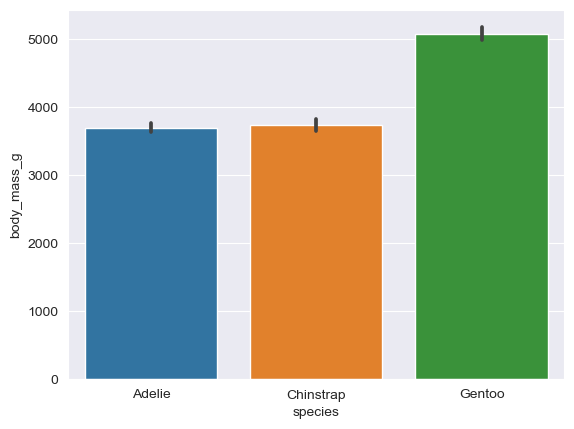

In [5]:
sns.barplot(x="species", y="body_mass_g", data=penguins);

In [6]:
penguins.groupby("species").body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

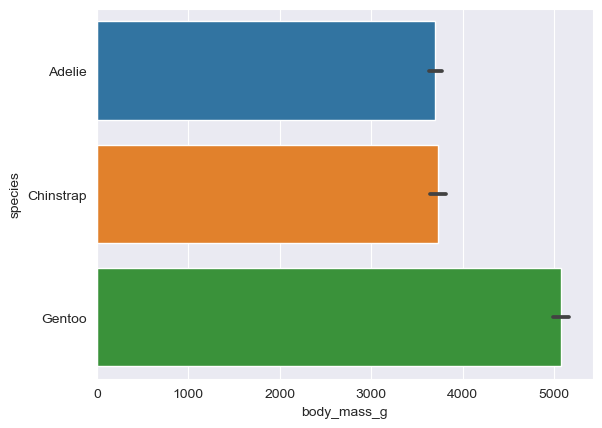

In [7]:
sns.barplot(x="body_mass_g", y="species", data=penguins);

### Interval Estimates

### Confidence Interval (ci)

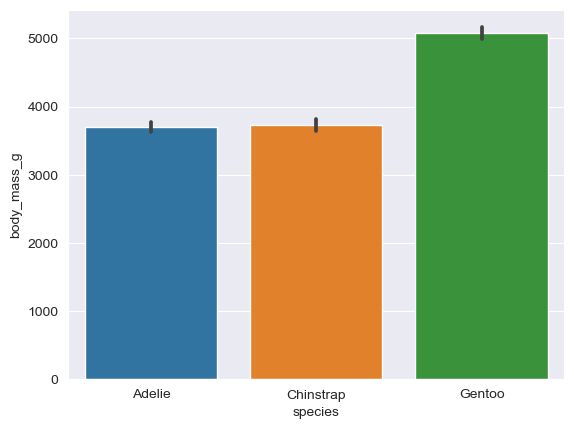

In [8]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
            errorbar = ("ci", 95) # default
           );

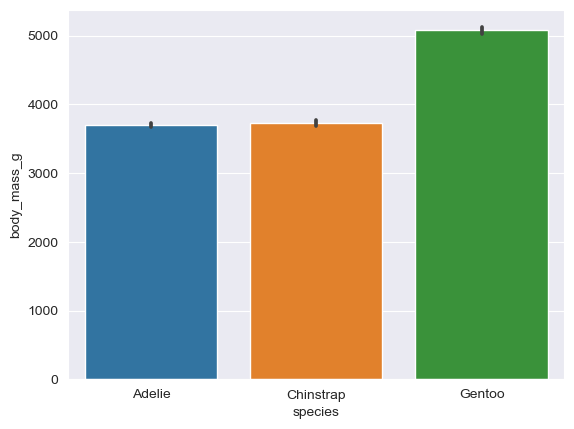

In [9]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
           errorbar = ("ci", 68)
           );

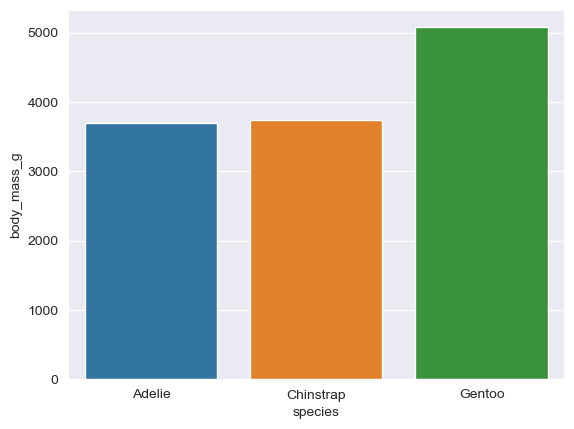

In [10]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
            errorbar=None);

<Axes: xlabel='species', ylabel='body_mass_g'>

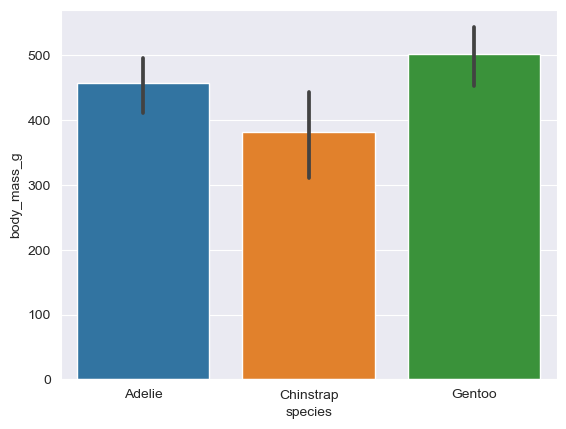

In [11]:
sns.barplot(x="species", y="body_mass_g",
            data=penguins,
           estimator = np.std
           )

In [12]:
penguins.groupby("species").body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


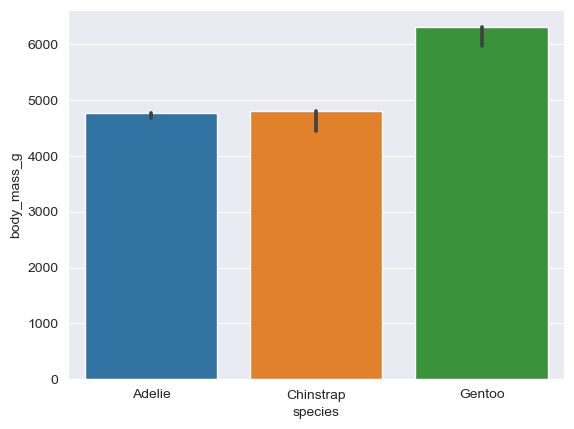

In [13]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
           estimator=np.max
           );

### hue

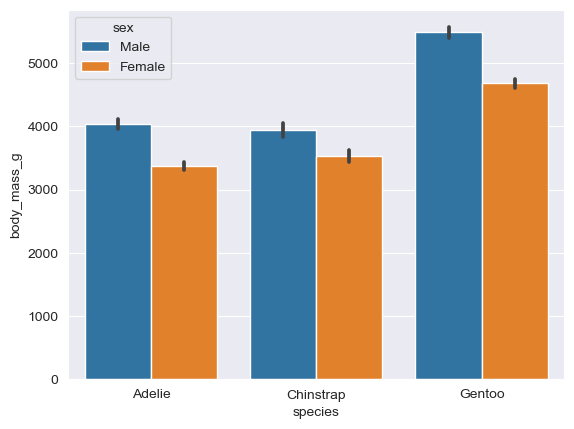

In [14]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
           hue="sex"
           );

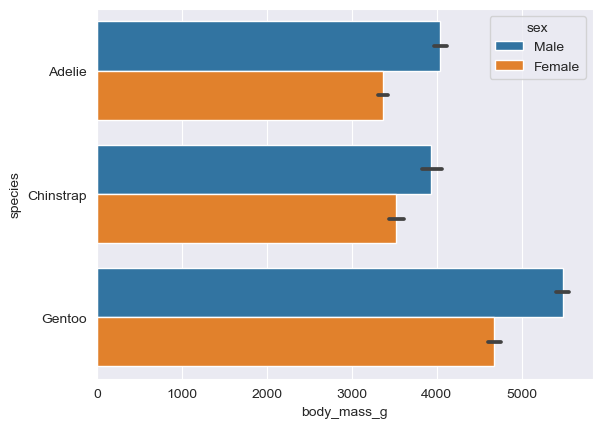

In [15]:
sns.barplot(x="body_mass_g", y="species",
           data=penguins,
           hue="sex"
           );

### order, hue_order

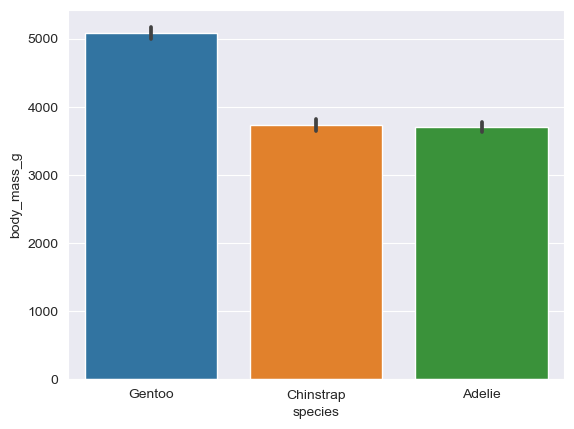

In [16]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
           order=["Gentoo", "Chinstrap", "Adelie"],
           );

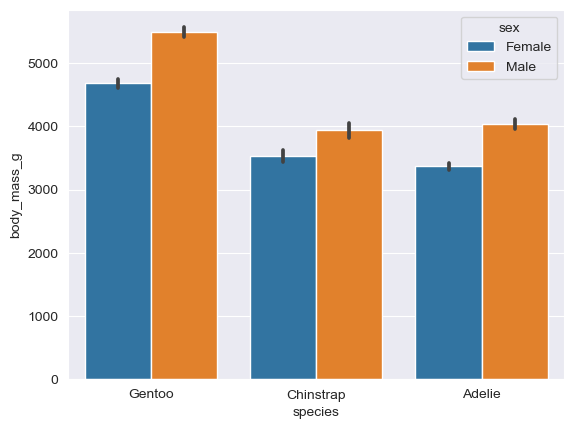

In [17]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
            hue="sex",
           order=["Gentoo", "Chinstrap", "Adelie"],
            hue_order=["Female", "Male"]
           );

### color

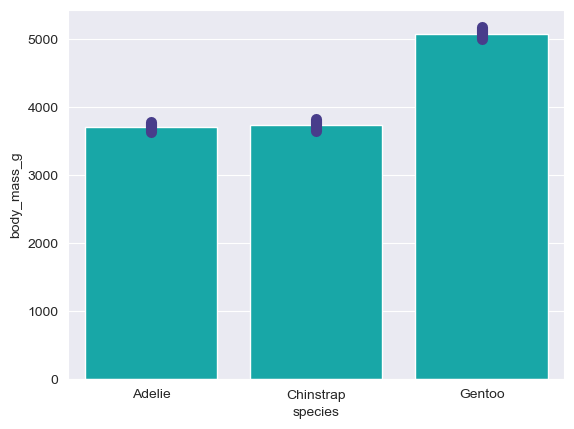

In [22]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
            color="c",
            errcolor="darkslateblue",
            errwidth=8
           );

### palette

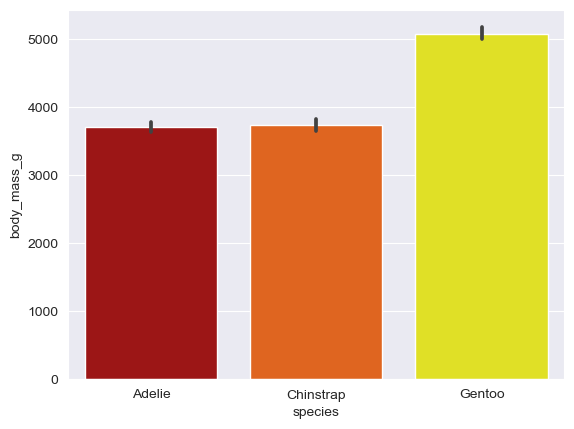

In [23]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
           palette="hot"
           );

### edgecolor and linewidth

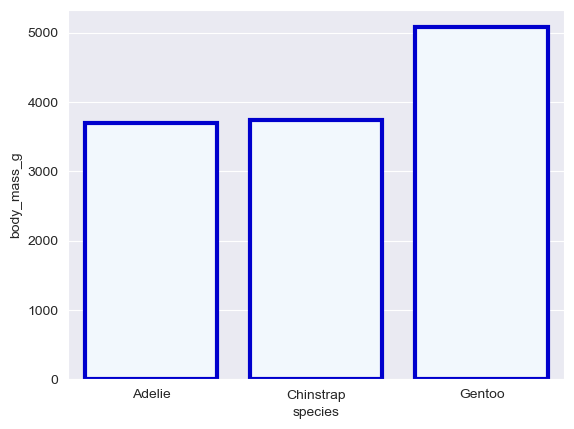

In [28]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins,
           errorbar=None,
           color="aliceblue",
           edgecolor="mediumblue",
           lw=3
           );

### BONUS: Stacked Barplot

In [31]:
penguins_sample = penguins.dropna().groupby(["species", "sex"]).sample(3, random_state=10)

penguins_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,Female
193,Chinstrap,Dream,46.2,17.5,187.0,3650.0,Female
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,Male


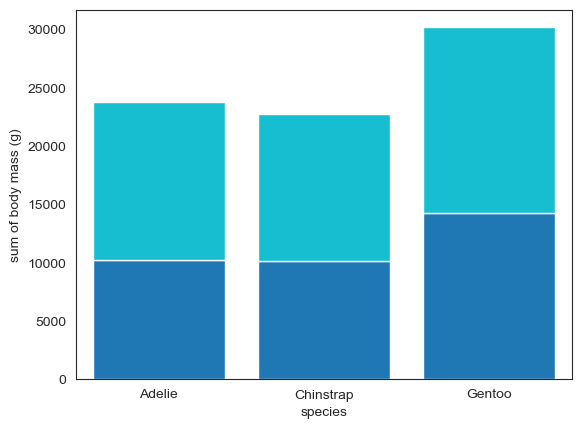

In [62]:
sns.barplot(x="species", y="body_mass_g",
           data=penguins_sample[penguins_sample.sex=="Female"],
           color="tab:blue",
            order=["Adelie", "Chinstrap", "Gentoo"],
            errorbar=None,
            estimator=np.sum,
           saturation=1
           )
sns.barplot(x="species", y="body_mass_g",
           data=penguins_sample[penguins_sample.sex=="Male"],
            color="tab:cyan",
            order=["Adelie", "Chinstrap", "Gentoo"],
            errorbar=None,
            estimator=np.sum,
            bottom=(
                penguins_sample[penguins_sample.sex=="Female"]
                .groupby("species")
                .body_mass_g
                .sum()),
            saturation=1
           )
plt.ylabel("sum of body mass (g)");

#### Much, much easier to accomplish this with pandas plotting method!... And comes with legend already buil.

In [49]:
sns.set_style("white")

Text(0, 0.5, 'Sum of body mass (g)')

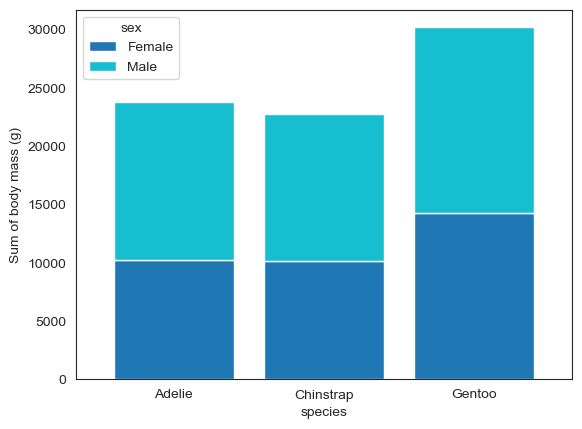

In [59]:
(penguins_sample
    .groupby(["species", "sex"])
    .body_mass_g
    .sum()
    .unstack()
    ).plot(kind="bar", stacked=True, color=["tab:blue", "tab:cyan"], width=0.8)

plt.xticks(rotation=0)
plt.ylabel("Sum of body mass (g)")